In [1]:
#import all libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle
import os
import glob

In [2]:
from sklearn.metrics import precision_score, recall_score
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


In [3]:
%matplotlib inline

    Characteristics of Dataset
      ==========================

The files for the dataset represent a individual trial performed by a subject wearing 
a wireless batteryless sensor. Each trial consists of the performance of scripted ADL. 
The files are anonymized; however, indication of the gender of the participant is 
indicated at the end of the file name.

The content of the file is as follows:
Comma separated values (CSV) format.
Column 1: Time in seconds starting from 0 rounded to the closest 0.025s
Column 2: Acceleration reading in G for frontal axis
Column 3: Acceleration reading in G for vertical axis
Column 4: Acceleration reading in G for lateral axis
Column 5: Id of antenna reading sensor
Column 6: Received signal strength indicator (RSSI) 
Column 7: Phase
Column 8: Frequency
Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating

Additional Information
======================

If you wish to use these datasets please cite this paper.

In [4]:
# crreating a logger

import logging as lg
lg.basicConfig(filename="load_data.log", level=lg.DEBUG, format="%(asctime)s, %(lineno)s, %(message)s")

In [5]:
try:
    lg.info("combining bending1 dataset into one ")
    path = os.getcwd() + '\S1_Dataset'
    all_csv = glob.glob(path + "/*")
    lis = []
    for csv in all_csv:
        df = pd.read_csv(csv, header=None, sep=',', skiprows=5, error_bad_lines=False)
        lis.append(df)
    training= pd.concat(lis, axis=0, ignore_index=True)
except Exception as e:
    lg.error(e)

In [6]:
lg.info("saving the data")
training.to_csv('training.csv')

In [12]:
lg.info("reading the dataset")
df = pd.read_csv('training.csv' , index_col=0)
df.head()

0        1        2         3  4     5       6       7  8
0  3.25  0.34238  0.96229 -0.059296  4 -56.5  1.2563  924.75  1
1  4.00  0.30721  0.99674 -0.070699  1 -63.5  3.8718  922.75  1
2  5.00  0.27203  0.99674 -0.093505  1 -64.0  2.4943  924.25  1
3  5.50  0.23685  1.03120 -0.127710  1 -64.5  2.0080  924.75  1
4  6.00  0.23685  1.03120 -0.127710  1 -66.0  1.1904  925.75  1

In [8]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.shape

(52182, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52182 entries, 0 to 52181
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52182 non-null  float64
 1   1       52182 non-null  float64
 2   2       52182 non-null  float64
 3   3       52182 non-null  float64
 4   4       52182 non-null  int64  
 5   5       52182 non-null  float64
 6   6       52182 non-null  float64
 7   7       52182 non-null  float64
 8   8       52182 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 4.0 MB


In [15]:
df.describe()

0             1             2             3             4  \
count  52182.000000  52182.000000  52182.000000  52182.000000  52182.000000   
mean     236.326476      0.807298      0.375928      0.007130      2.361696   
std      147.640391      0.395332      0.468442      0.179673      1.261450   
min        0.125000     -0.748080     -0.553490     -0.481210      1.000000   
25%      119.650000      0.436190     -0.025263     -0.093505      1.000000   
50%      228.715000      0.952100      0.124020     -0.025087      3.000000   
75%      326.480000      1.128000      0.916360      0.066138      4.000000   
max      730.250000      1.503200      2.030200      1.103800      4.000000   

                  5             6            7             8  
count  52182.000000  52182.000000  52182.00000  52182.000000  
mean     -58.444099      3.275031    922.76053      2.374631  
std        4.590704      2.240614      1.69400      0.939431  
min      -70.000000      0.000000    920.25000      1.000000  
25%      -61.500000      0.949530    921.25000      1.000000  
50%      -57.500000      4.071200    922.75000      3.000000  
75%      -56.500000      5.425325    924.25000      3.000000  
max      -38.500000      6.281700    925.75000      4.000000

In [16]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [17]:
df.columns = ['time_in_sec', 'Acceleration_frontal_axis(in G)', 
                    'Acceleration_vertical_axis(in G)', 'Acceleration_lateral_axis(in G)',
                   'id_of_antenna_reading', 'signal_strength_indicator(RSSI)', 'Phase',
                   'Frequency', 'target']

In [18]:
df

time_in_sec  Acceleration_frontal_axis(in G)  \
0             3.25                         0.342380   
1             4.00                         0.307210   
2             5.00                         0.272030   
3             5.50                         0.236850   
4             6.00                         0.236850   
...            ...                              ...   
52177       485.00                         0.330660   
52178       485.08                         0.330660   
52179       485.50                         0.330660   
52180       488.25                         0.119600   
52181       488.75                         0.072698   

       Acceleration_vertical_axis(in G)  Acceleration_lateral_axis(in G)  \
0                               0.96229                        -0.059296   
1                               0.99674                        -0.070699   
2                               0.99674                        -0.093505   
3                               1.03120                        -0.127710   
4                               1.03120                        -0.127710   
...                                 ...                              ...   
52177                           0.95081                        -0.230340   
52178                           0.95081                        -0.230340   
52179                           0.95081                        -0.230340   
52180                           0.82449                         0.009122   
52181                           1.31830                         0.009122   

       id_of_antenna_reading  signal_strength_indicator(RSSI)   Phase  \
0                          4                            -56.5  1.2563   
1                          1                            -63.5  3.8718   
2                          1                            -64.0  2.4943   
3                          1                            -64.5  2.0080   
4                          1                            -66.0  1.1904   
...                      ...                              ...     ...   
52177                      1                            -57.0  6.2188   
52178                      3                            -58.0  0.8805   
52179                      1                            -60.5  5.0054   
52180                      4                            -56.0  4.9087   
52181                      4                            -56.5  1.0370   

       Frequency  target  
0         924.75       1  
1         922.75       1  
2         924.25       1  
3         924.75       1  
4         925.75       1  
...          ...     ...  
52177     921.75       1  
52178     921.75       1  
52179     924.75       1  
52180     925.75       4  
52181     922.75       4  

[52182 rows x 9 columns]

In [19]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df.isnull().sum()

time_in_sec                         0
Acceleration_frontal_axis(in G)     0
Acceleration_vertical_axis(in G)    0
Acceleration_lateral_axis(in G)     0
id_of_antenna_reading               0
signal_strength_indicator(RSSI)     0
Phase                               0
Frequency                           0
target                              0
dtype: int64

In [21]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Time in Seconds')

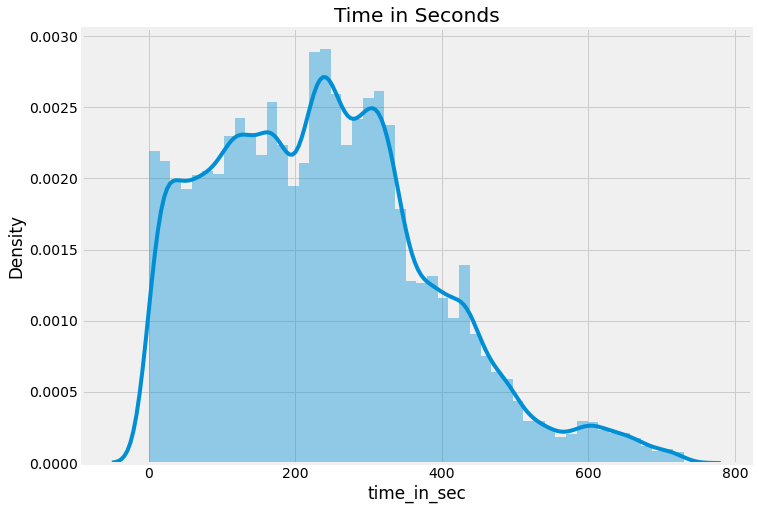

In [22]:

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['time_in_sec'])
plt.title("Time in Seconds")

Text(0.5, 1.0, 'Acceleration_frontal_axis(in G)')

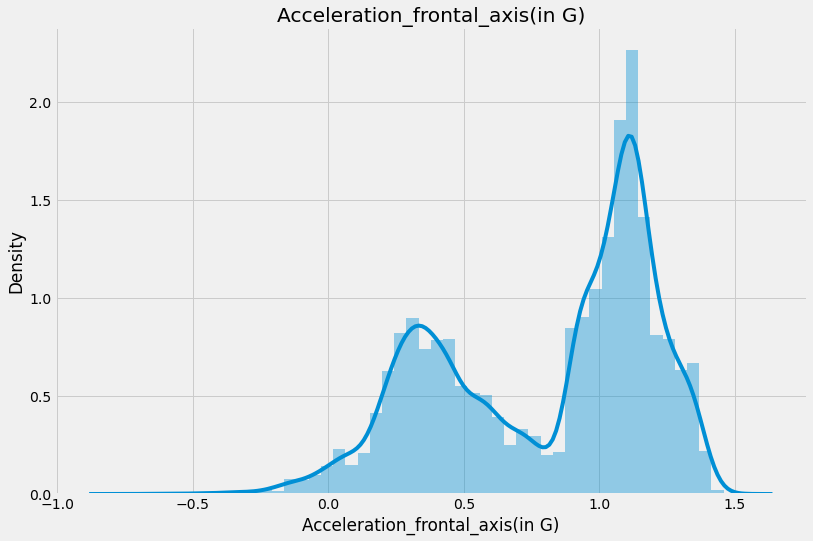

In [23]:

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['Acceleration_frontal_axis(in G)'])
plt.title('Acceleration_frontal_axis(in G)')

Text(0.5, 1.0, 'Acceleration_vertical_axis(in G)')

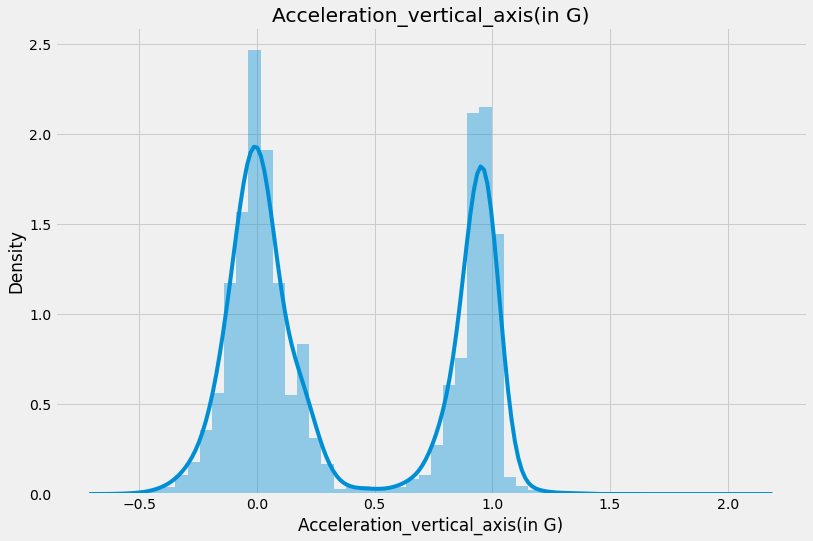

In [24]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['Acceleration_vertical_axis(in G)'])
plt.title('Acceleration_vertical_axis(in G)')

Text(0.5, 1.0, 'Acceleration_lateral_axis(in G)')

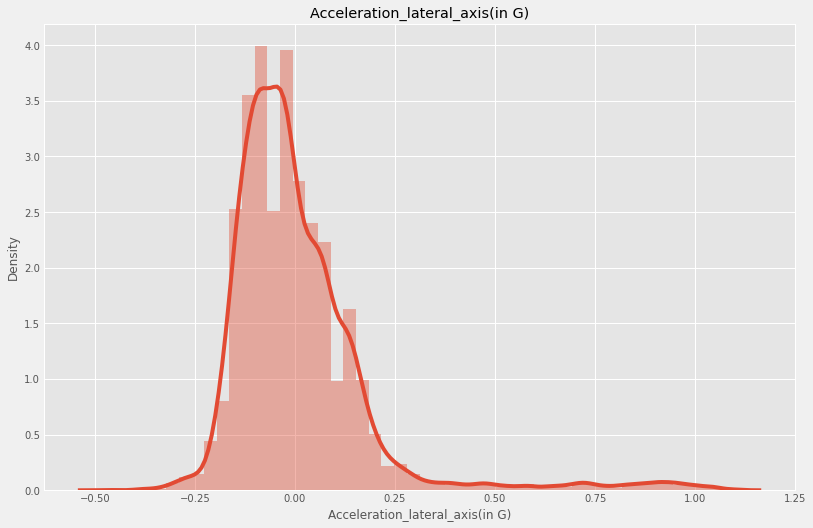

In [25]:

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
sns.distplot(df['Acceleration_lateral_axis(in G)'])
plt.title('Acceleration_lateral_axis(in G)')

Text(0.5, 1.0, 'id_of_antenna_reading')

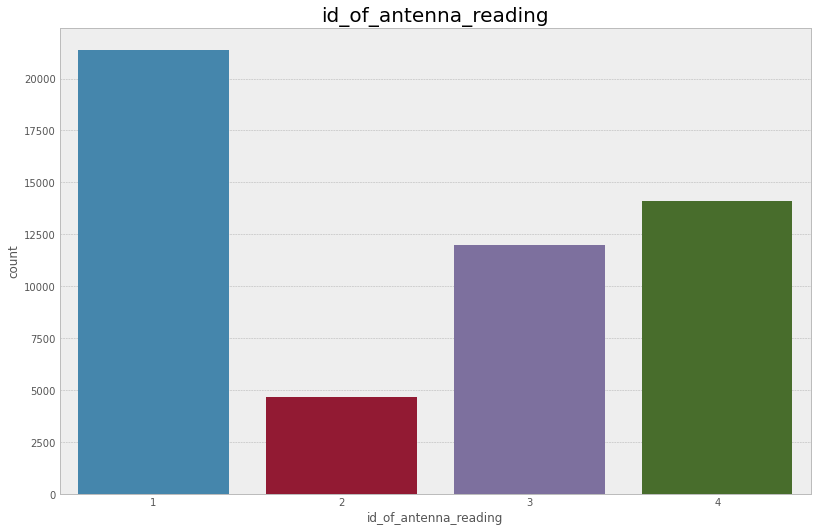

In [26]:

plt.figure(figsize=(12, 8))
plt.style.use('bmh')
sns.countplot(df['id_of_antenna_reading'])
plt.title('id_of_antenna_reading', fontsize=20)

Text(0.5, 1.0, 'signal_strength_indicator(RSSI)')

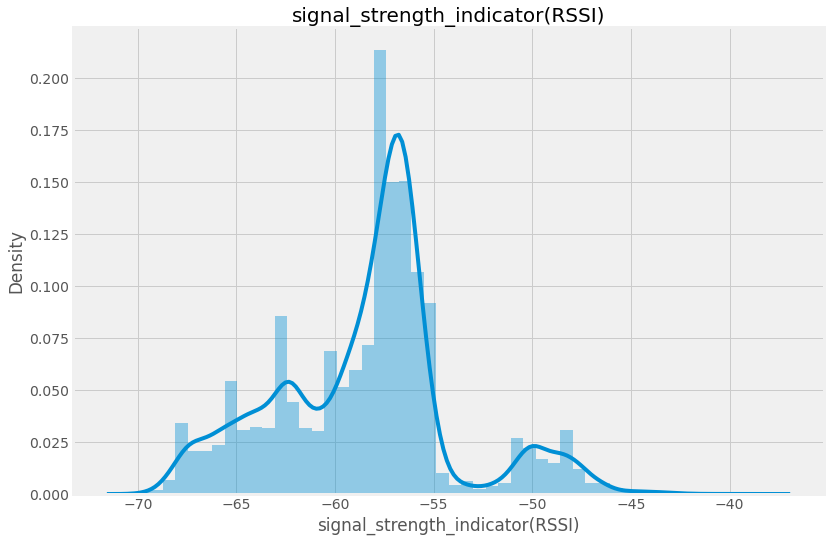

In [27]:

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['signal_strength_indicator(RSSI)'])
plt.title('signal_strength_indicator(RSSI)', fontsize=20)

Text(0.5, 1.0, 'Phase')

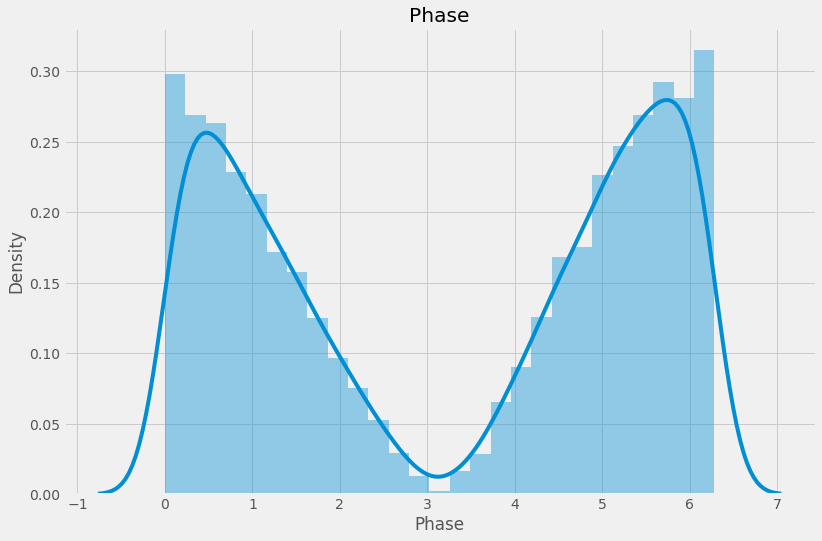

In [28]:

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['Phase'])
plt.title('Phase')

Text(0.5, 1.0, 'Frequency')

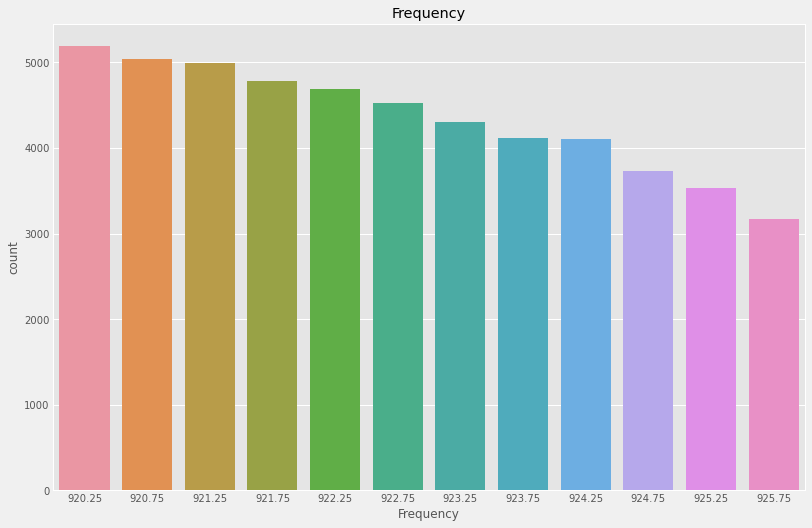

In [29]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
sns.countplot(df['Frequency'])
plt.title('Frequency')


Text(0.5, 1.0, 'target')

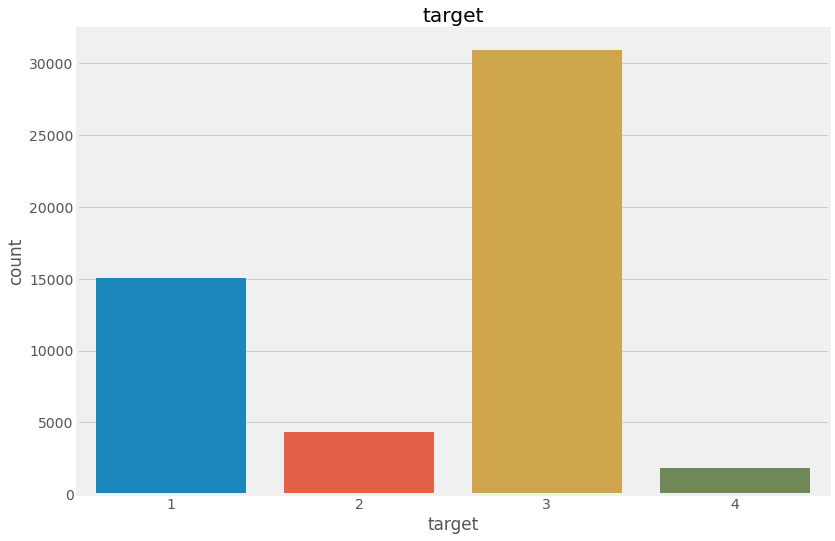

In [30]:

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(df['target'])
plt.title('target')


#we got 4 categories or classes in which lying has max points.
#1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating
# we had lying is maximum category which occurs

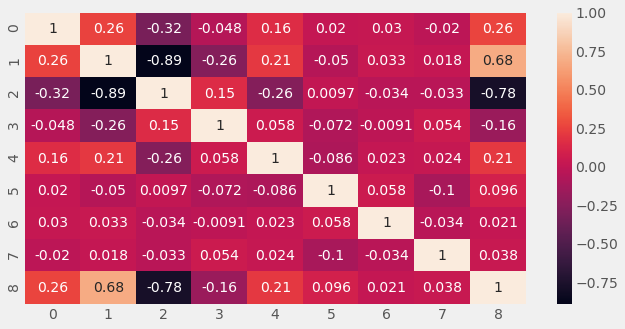

In [31]:
plt.figure(figsize=(10 ,5))
sns.heatmap(training.corr(), annot=True)
plt.show()

#there's negative correlation between  Acceleartion in frontal axis and vertical we have to remove one of those 
#acceleration frontal axis and target are +positivelt correlated.
#acceleration vertical axis and target are -negatively correlated.

In [32]:
#we got 
x = df.drop(['target'], axis=1)
y = df['target']

In [33]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [34]:
vif_score(x)

FEATURE  VIF_SCORE
0                       time_in_sec   1.123865
1   Acceleration_frontal_axis(in G)   5.431516
2  Acceleration_vertical_axis(in G)   5.445115
3   Acceleration_lateral_axis(in G)   1.128134
4             id_of_antenna_reading   1.099846
5   signal_strength_indicator(RSSI)   1.040338
6                             Phase   1.006313
7                         Frequency   1.016832

In [31]:
#we are going to drop  feature 1 or 2 either one 

In [35]:
x.columns

Index(['time_in_sec', 'Acceleration_frontal_axis(in G)',
       'Acceleration_vertical_axis(in G)', 'Acceleration_lateral_axis(in G)',
       'id_of_antenna_reading', 'signal_strength_indicator(RSSI)', 'Phase',
       'Frequency'],
      dtype='object')

<AxesSubplot:xlabel='Acceleration_frontal_axis(in G)'>

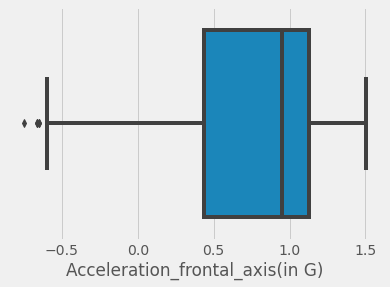

In [39]:
#we will drop this feature
sns.boxplot(df['Acceleration_frontal_axis(in G)'])

<AxesSubplot:xlabel='Acceleration_vertical_axis(in G)'>

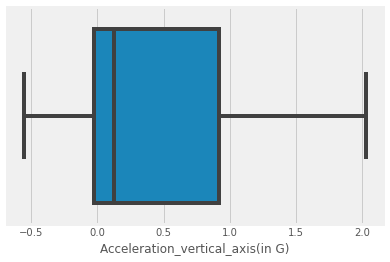

In [41]:
sns.boxplot(df['Acceleration_vertical_axis(in G)'])

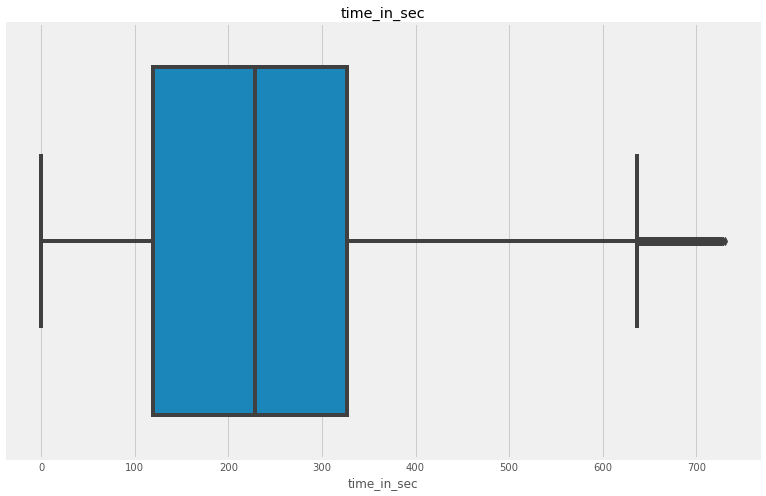

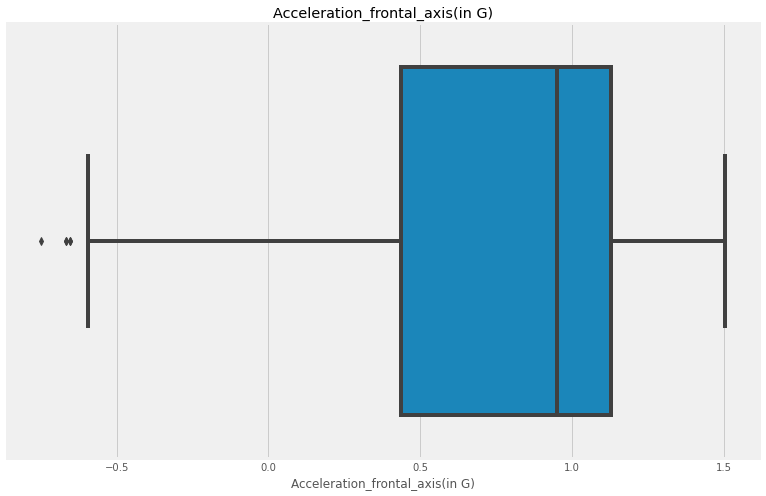

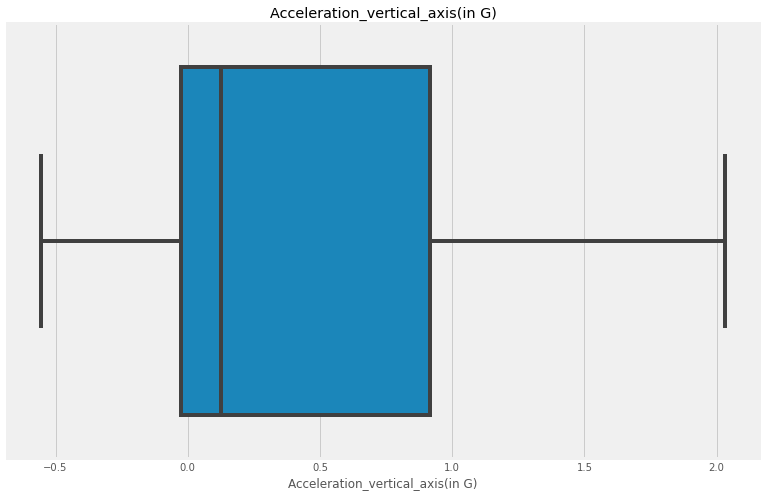

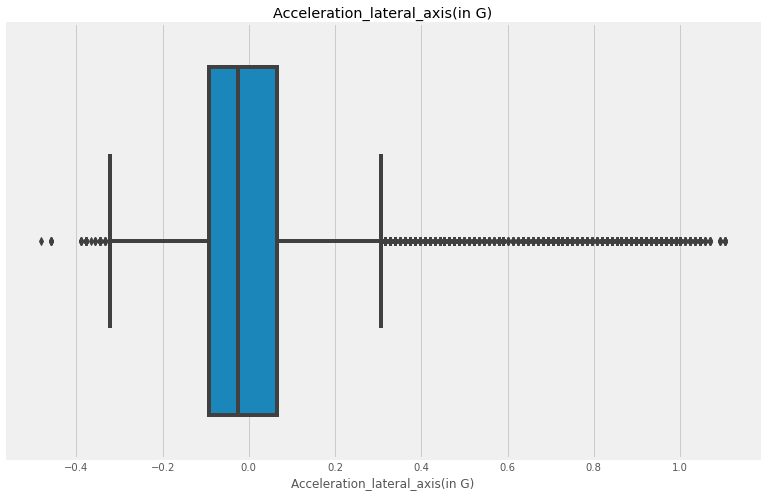

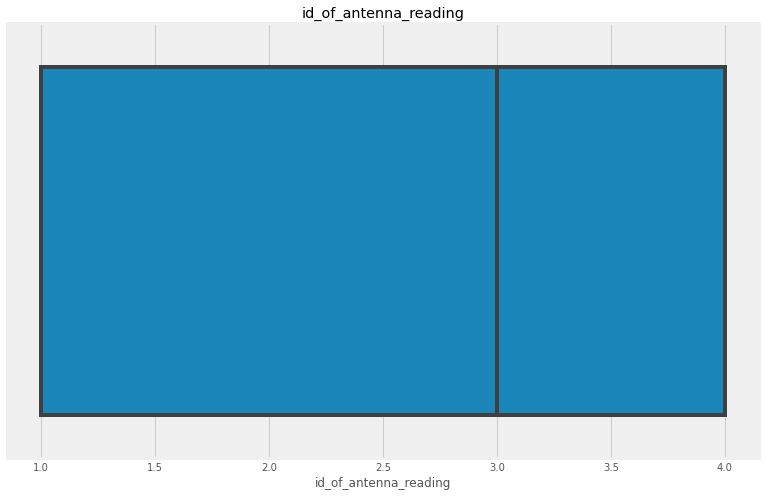

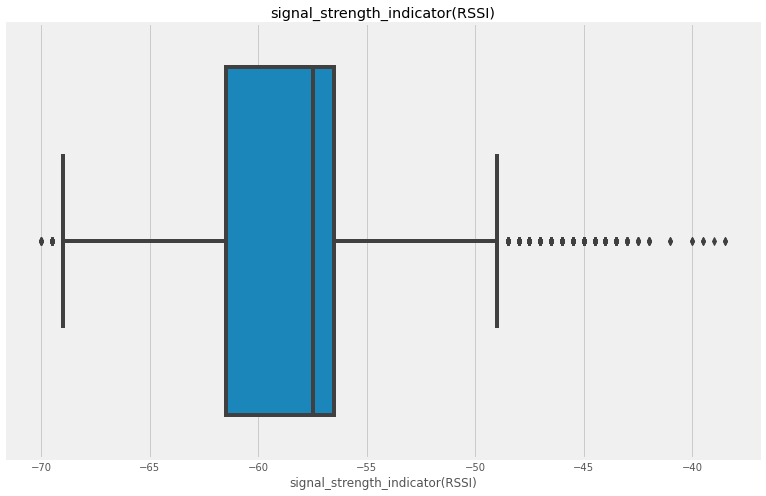

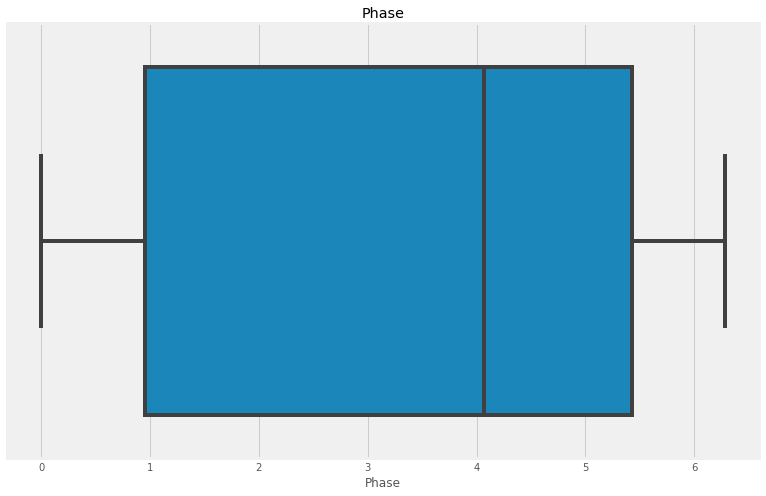

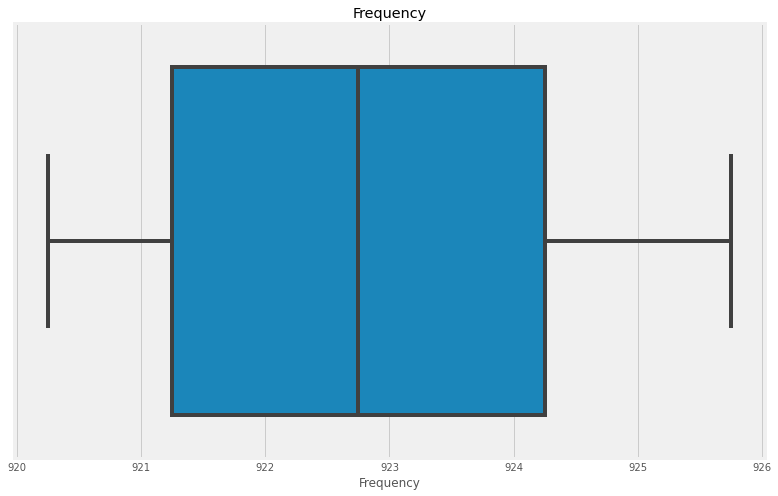

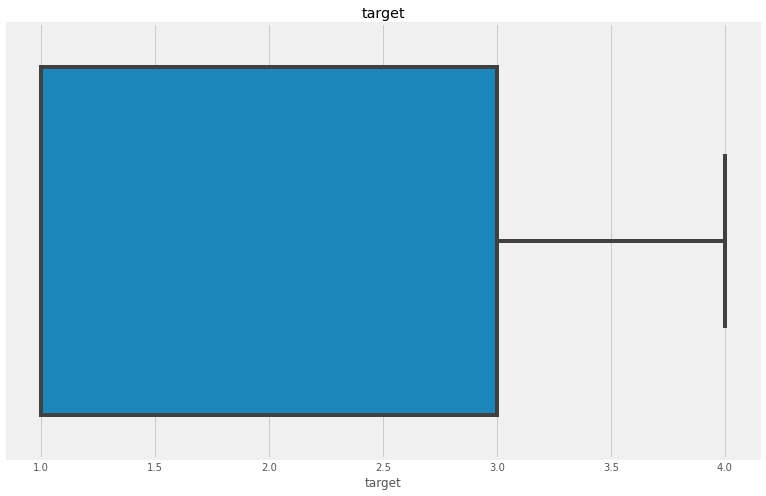

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
for feature in df.columns:
    df=df.copy()
    plt.figure(figsize=(12, 8))
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [36]:
#we can clearly see that we got outliers and we will try to remove as much we can 
#without loosing many points

In [37]:
max_threshold = df['time_in_sec'].quantile(0.95)
max_threshold

497.5

<AxesSubplot:>

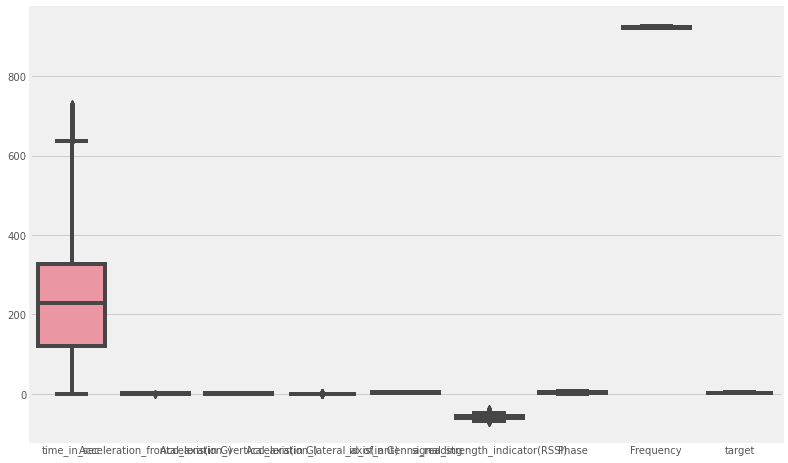

In [44]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.boxplot(data=df, ax=ax)

In [45]:
q = df['time_in_sec'].quantile(.98)
df_new = df[df['time_in_sec']<q]

In [46]:
df_new.shape

(51138, 9)

In [47]:
df.shape

(52182, 9)

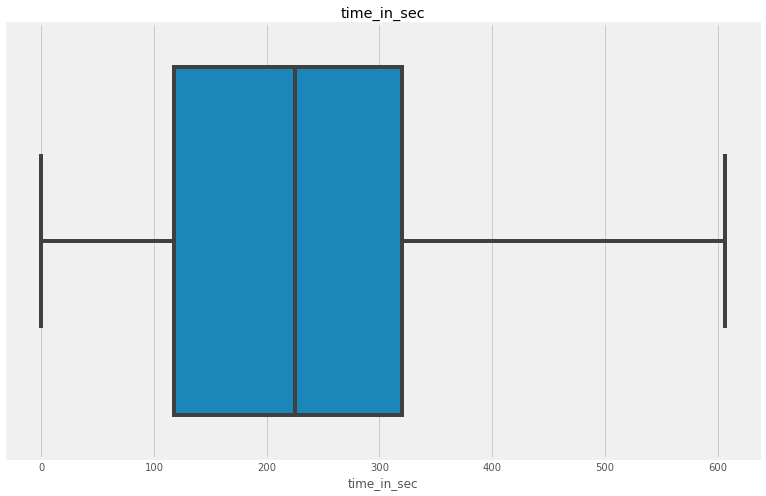

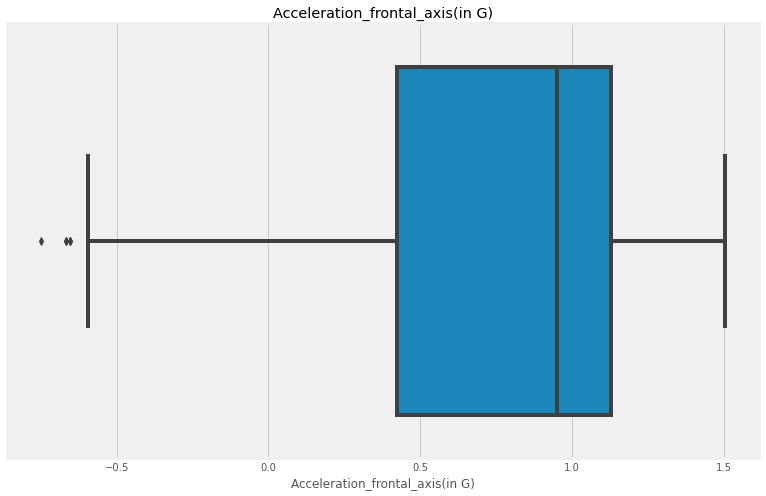

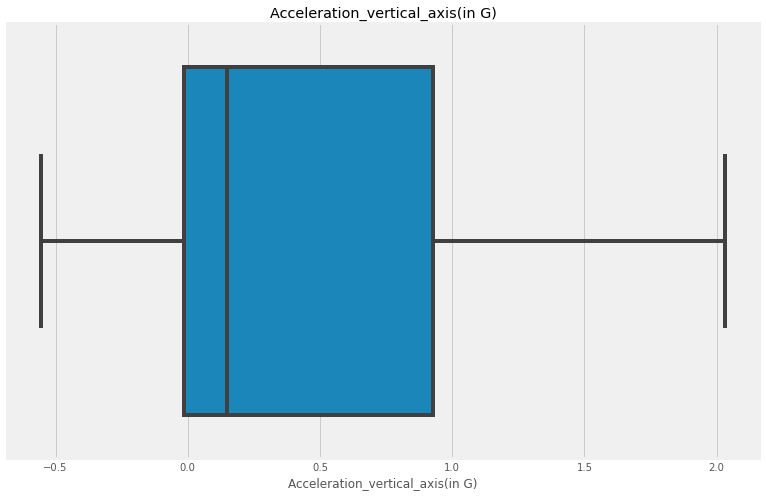

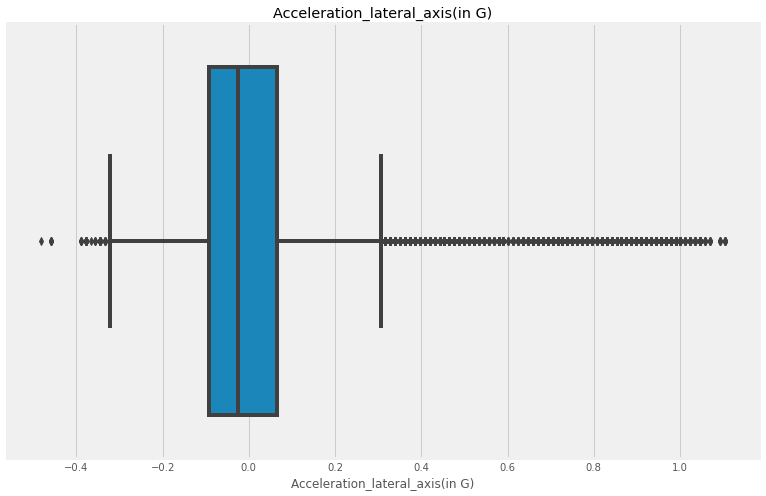

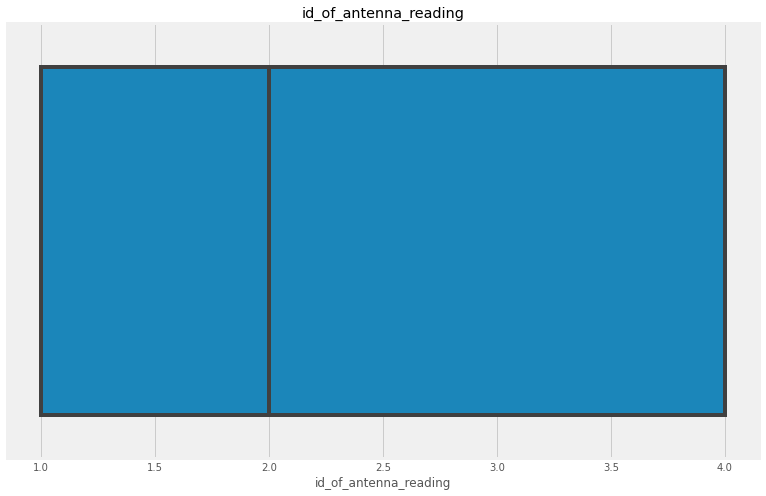

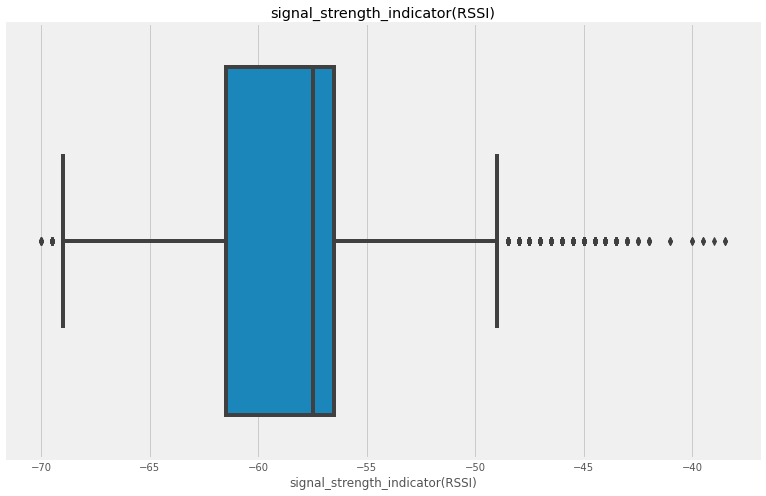

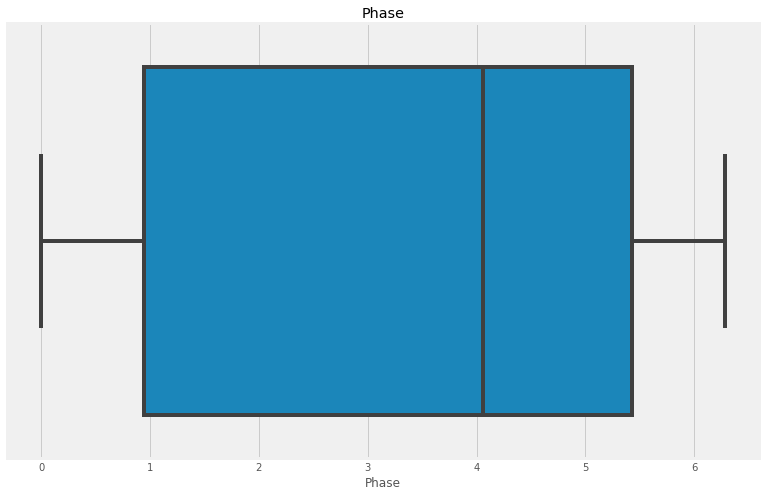

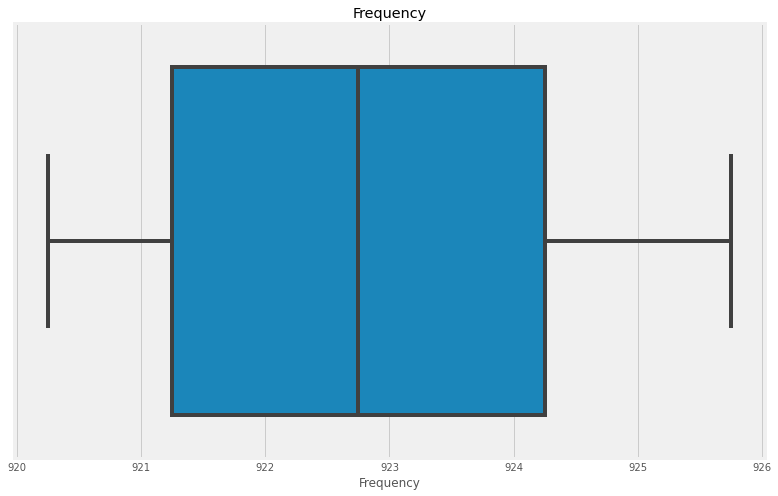

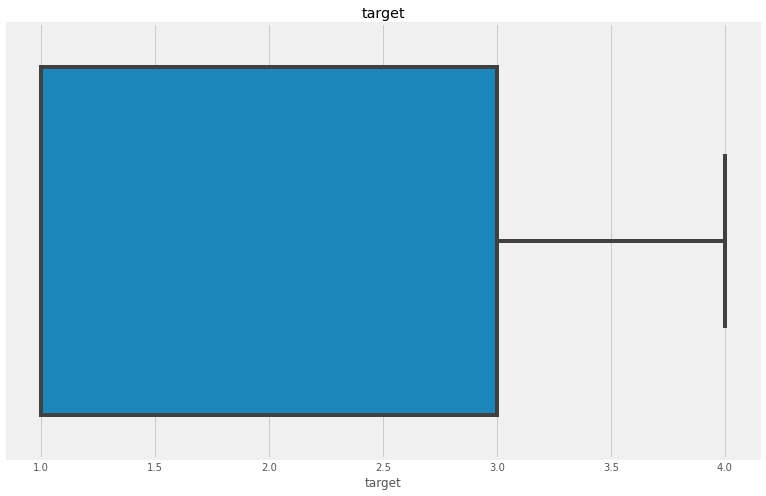

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
for feature in df_new:
    df_new=df_new.copy()
    plt.figure(figsize=(12, 8))
    sns.boxplot(df_new[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [49]:
df_new.columns

Index(['time_in_sec', 'Acceleration_frontal_axis(in G)',
       'Acceleration_vertical_axis(in G)', 'Acceleration_lateral_axis(in G)',
       'id_of_antenna_reading', 'signal_strength_indicator(RSSI)', 'Phase',
       'Frequency', 'target'],
      dtype='object')

In [50]:
q = df_new['Acceleration_lateral_axis(in G)'].quantile(.97)
df_new = df_new[df_new['Acceleration_lateral_axis(in G)']<q]

In [51]:
df_new.shape

(49574, 9)

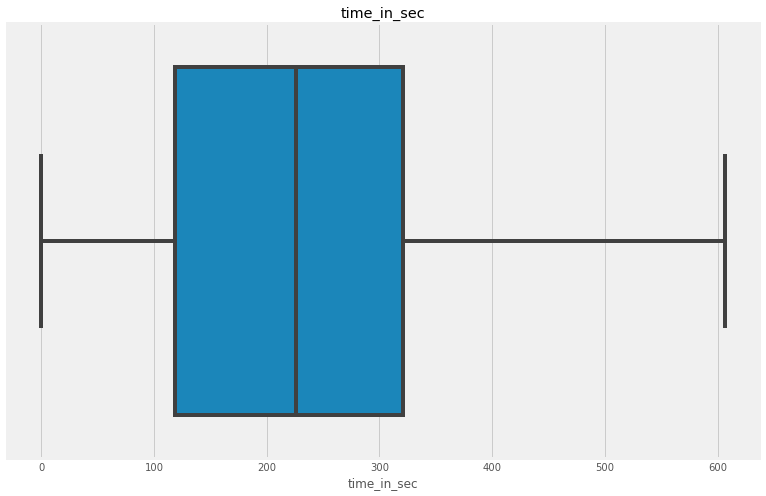

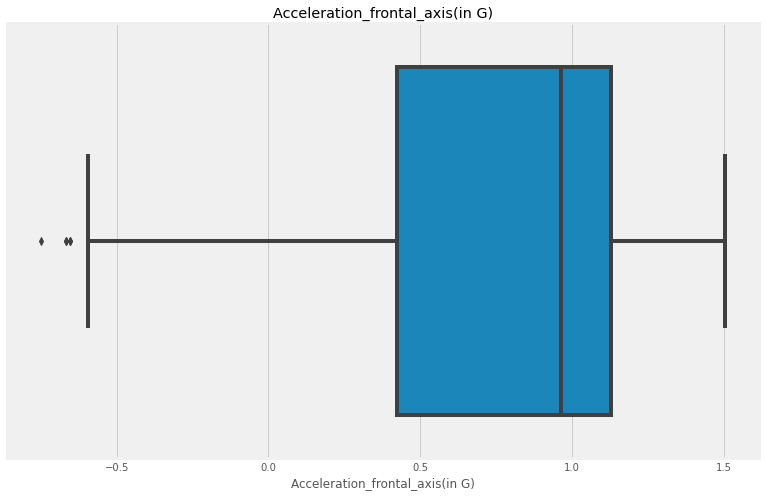

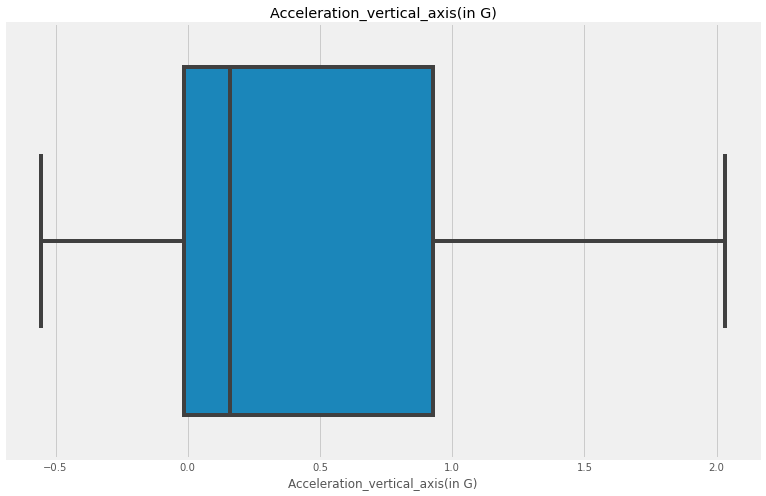

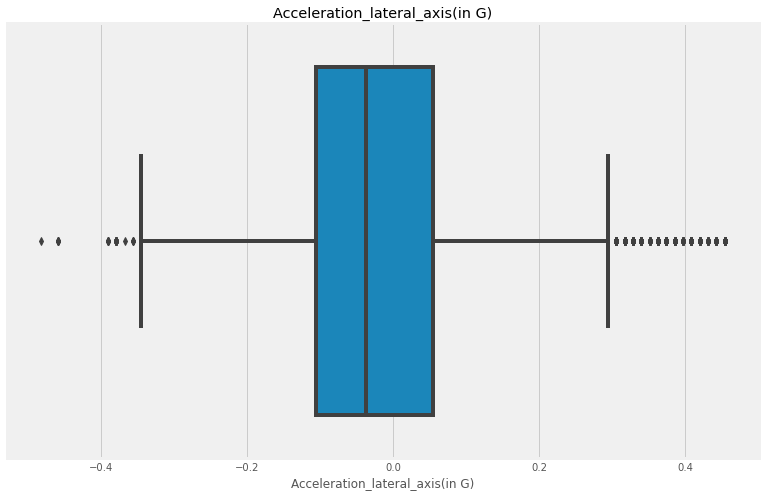

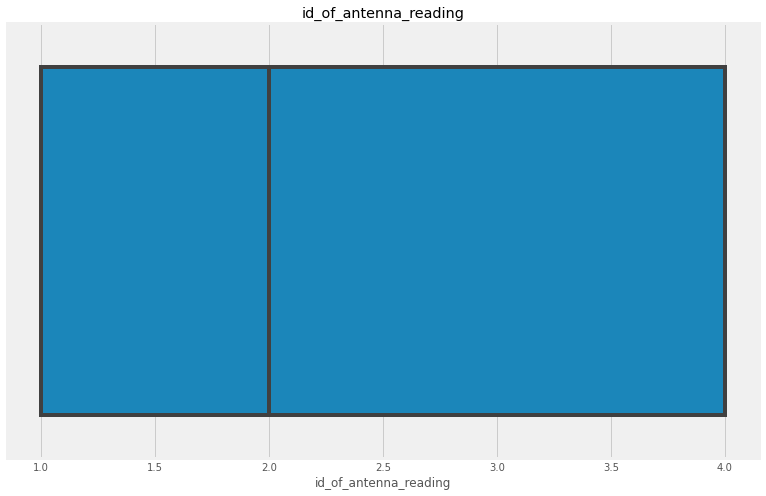

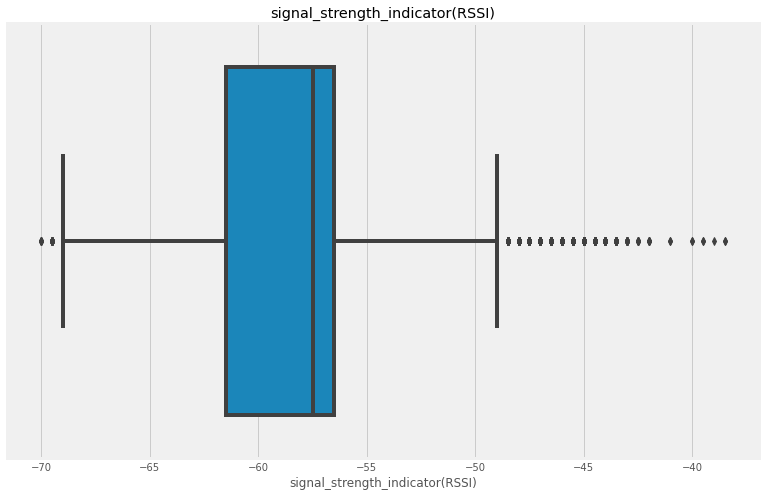

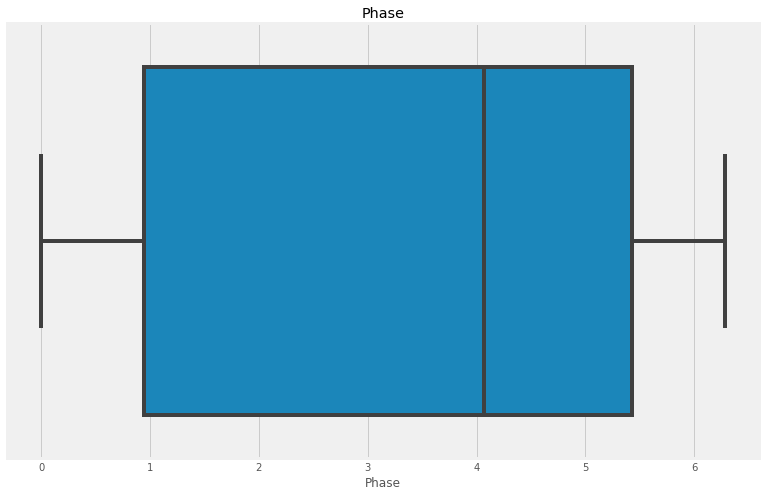

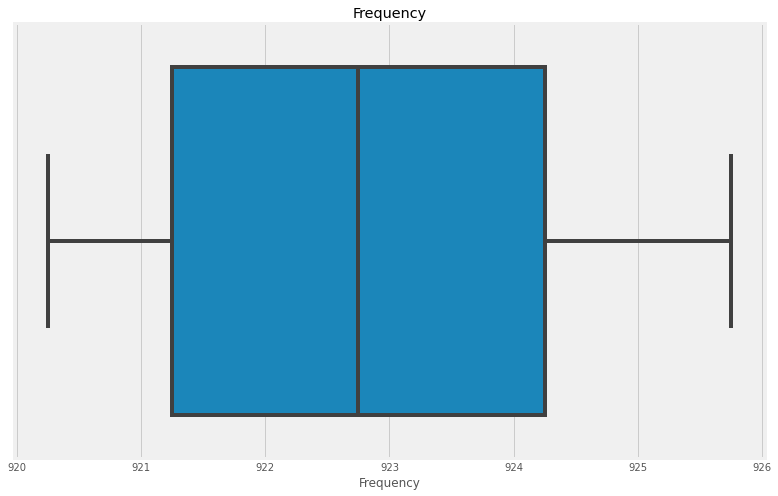

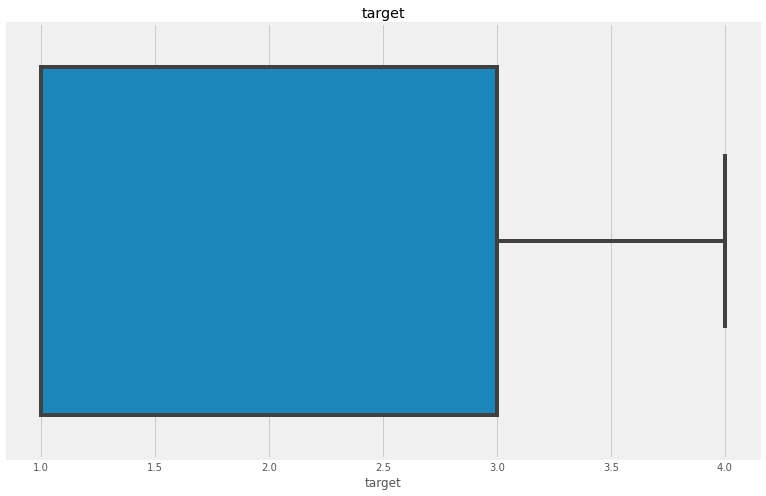

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
for feature in df_new:
    df_new=df_new.copy()
    plt.figure(figsize=(12, 8))
    sns.boxplot(df_new[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [53]:
q = df_new['signal_strength_indicator(RSSI)'].quantile(.99)
df_new = df_new[df_new['signal_strength_indicator(RSSI)'] < q]

In [54]:
df_new.shape

(48961, 9)

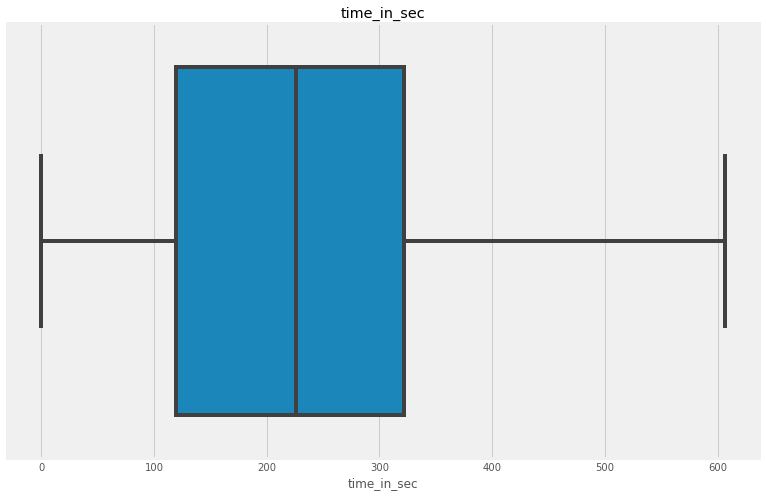

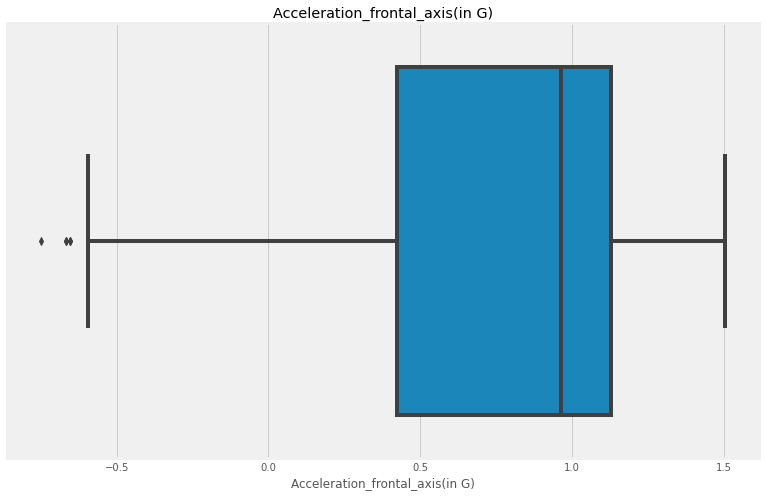

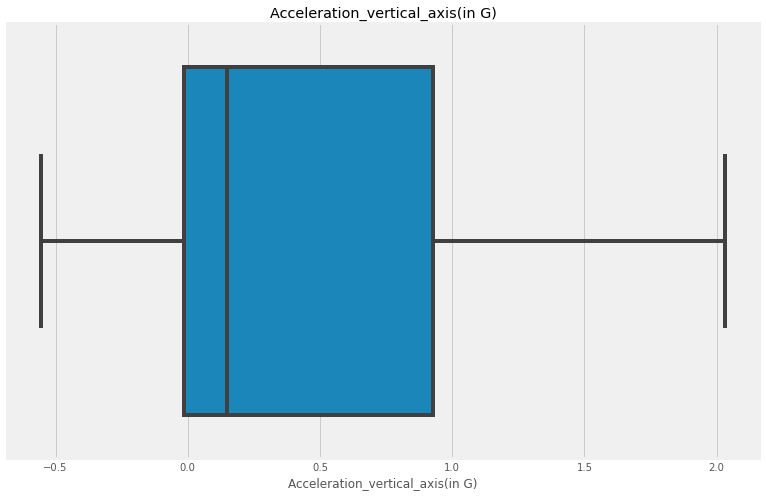

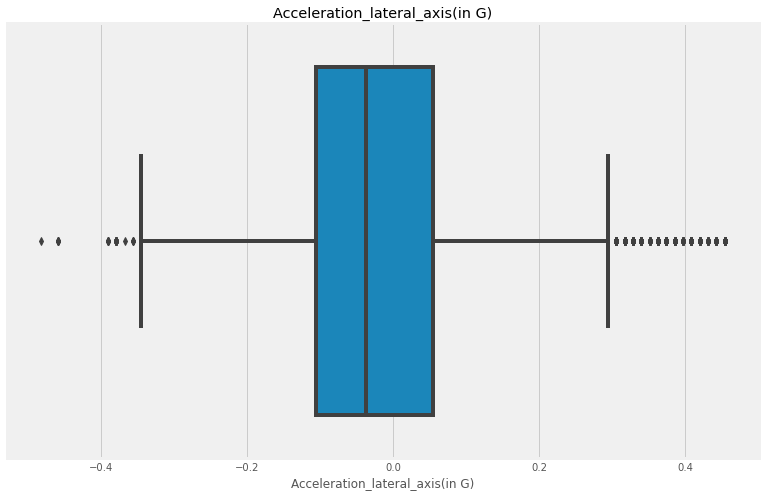

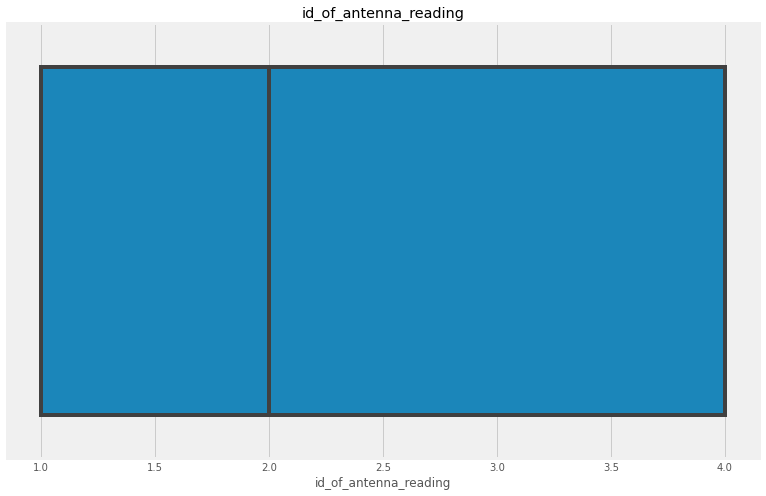

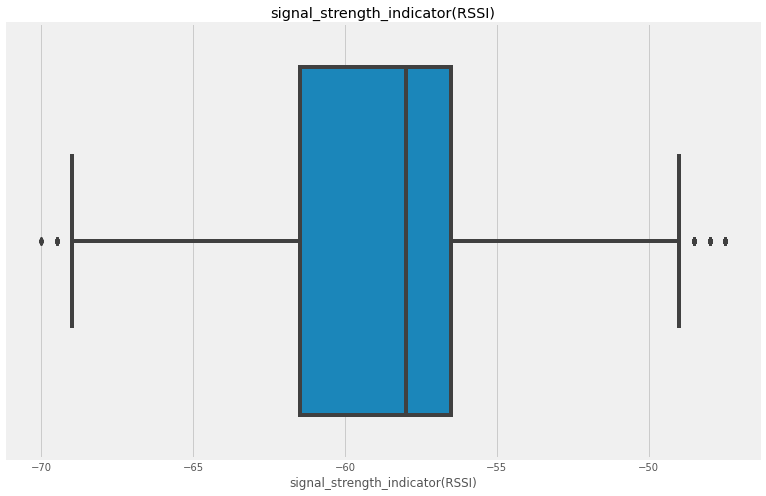

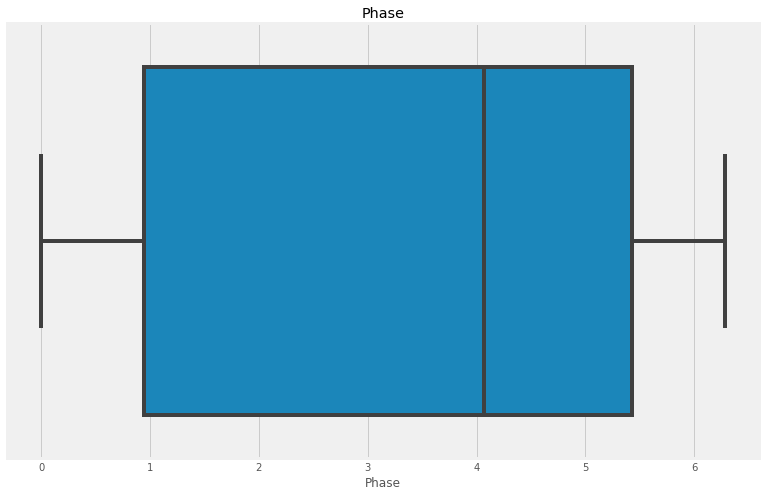

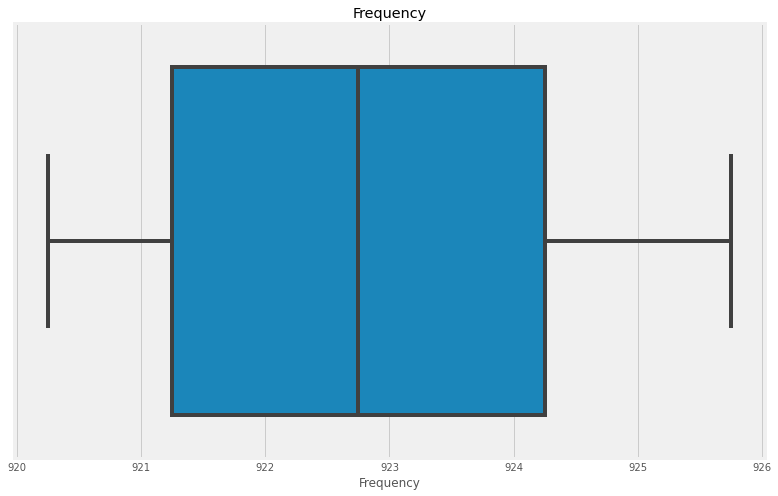

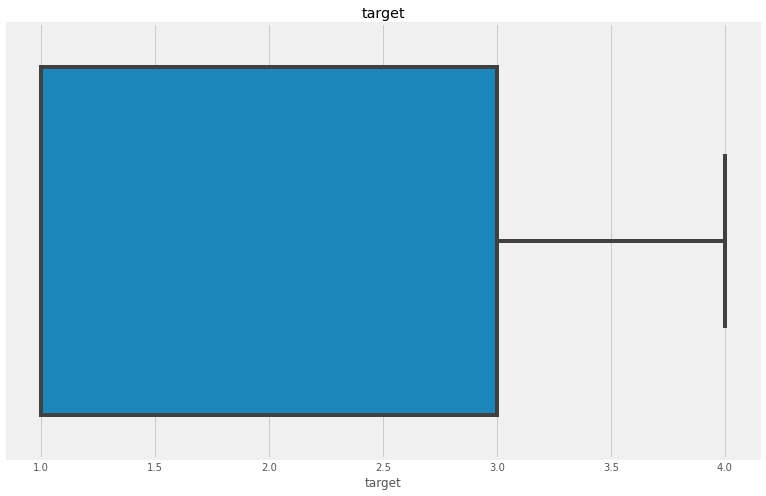

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
for feature in df_new:
    df_new=df_new.copy()
    plt.figure(figsize=(12, 8))
    sns.boxplot(df_new[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [56]:
 df_new.shape

(48961, 9)

In [57]:
df.shape

(52182, 9)

In [61]:
df_new.columns

Index(['time_in_sec', 'Acceleration_vertical_axis(in G)',
       'Acceleration_lateral_axis(in G)', 'id_of_antenna_reading',
       'signal_strength_indicator(RSSI)', 'Phase', 'Frequency', 'target'],
      dtype='object')

In [60]:
df_new.drop('Acceleration_frontal_axis(in G)' , axis=1, inplace=True)

In [62]:
df_new.to_csv('cleaned_data.csv')

In [63]:
df_new
#we got only 8 elements

time_in_sec  Acceleration_vertical_axis(in G)  \
0             3.25                           0.96229   
1             4.00                           0.99674   
2             5.00                           0.99674   
3             5.50                           1.03120   
4             6.00                           1.03120   
...            ...                               ...   
52177       485.00                           0.95081   
52178       485.08                           0.95081   
52179       485.50                           0.95081   
52180       488.25                           0.82449   
52181       488.75                           1.31830   

       Acceleration_lateral_axis(in G)  id_of_antenna_reading  \
0                            -0.059296                      4   
1                            -0.070699                      1   
2                            -0.093505                      1   
3                            -0.127710                      1   
4                            -0.127710                      1   
...                                ...                    ...   
52177                        -0.230340                      1   
52178                        -0.230340                      3   
52179                        -0.230340                      1   
52180                         0.009122                      4   
52181                         0.009122                      4   

       signal_strength_indicator(RSSI)   Phase  Frequency  target  
0                                -56.5  1.2563     924.75       1  
1                                -63.5  3.8718     922.75       1  
2                                -64.0  2.4943     924.25       1  
3                                -64.5  2.0080     924.75       1  
4                                -66.0  1.1904     925.75       1  
...                                ...     ...        ...     ...  
52177                            -57.0  6.2188     921.75       1  
52178                            -58.0  0.8805     921.75       1  
52179                            -60.5  5.0054     924.75       1  
52180                            -56.0  4.9087     925.75       4  
52181                            -56.5  1.0370     922.75       4  

[48961 rows x 8 columns]

In [64]:
#target
y = df_new['target']

In [65]:
#features without target
x = df_new.drop('target', axis=1)

In [66]:
x.shape

(48961, 7)

In [67]:
y.shape

(48961,)

In [68]:
#x.drop('Acceleration_frontal_axis(in G)',axis=1, inplace=True)

In [69]:
x

time_in_sec  Acceleration_vertical_axis(in G)  \
0             3.25                           0.96229   
1             4.00                           0.99674   
2             5.00                           0.99674   
3             5.50                           1.03120   
4             6.00                           1.03120   
...            ...                               ...   
52177       485.00                           0.95081   
52178       485.08                           0.95081   
52179       485.50                           0.95081   
52180       488.25                           0.82449   
52181       488.75                           1.31830   

       Acceleration_lateral_axis(in G)  id_of_antenna_reading  \
0                            -0.059296                      4   
1                            -0.070699                      1   
2                            -0.093505                      1   
3                            -0.127710                      1   
4                            -0.127710                      1   
...                                ...                    ...   
52177                        -0.230340                      1   
52178                        -0.230340                      3   
52179                        -0.230340                      1   
52180                         0.009122                      4   
52181                         0.009122                      4   

       signal_strength_indicator(RSSI)   Phase  Frequency  
0                                -56.5  1.2563     924.75  
1                                -63.5  3.8718     922.75  
2                                -64.0  2.4943     924.25  
3                                -64.5  2.0080     924.75  
4                                -66.0  1.1904     925.75  
...                                ...     ...        ...  
52177                            -57.0  6.2188     921.75  
52178                            -58.0  0.8805     921.75  
52179                            -60.5  5.0054     924.75  
52180                            -56.0  4.9087     925.75  
52181                            -56.5  1.0370     922.75  

[48961 rows x 7 columns]

In [70]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=.20,
                                               random_state=42)

In [71]:
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test  = sc.transform(x_test)

In [72]:
sc_x_train

array([[-0.35641186, -0.77336285, -0.98071163, ...,  0.58825421,
        -0.8664853 , -0.58879095],
       [-0.95610897, -1.60497038,  0.21970021, ..., -1.70592053,
        -1.29685838,  0.00231656],
       [-1.52972909, -0.87120091,  0.51981633, ..., -1.36179432,
         0.1288312 ,  0.29787032],
       ...,
       [ 1.33157523, -0.67552479, -1.18082062, ..., -1.36179432,
         0.71016729,  1.7756391 ],
       [ 0.32003881, -1.50713871, -0.78069036, ..., -1.47650305,
         0.85160466, -0.58879095],
       [-0.67812668,  1.30563361,  0.51981633, ...,  0.01471053,
         1.32770886,  1.7756391 ]])

In [73]:
sc_x_test

array([[-0.74645876, -0.77336285, -0.48056196, ..., -1.13237684,
        -0.29605984,  0.59342407],
       [-0.98436521,  1.23229713,  0.0196228 , ...,  0.35883674,
        -0.7052752 ,  1.18453158],
       [-1.11733575, -0.50430553, -2.18119014, ...,  0.01471053,
         0.62479719, -1.47545222],
       ...,
       [-1.33784522, -1.06688555, -0.38052501, ...,  0.70296295,
        -0.90678783, -0.58879095],
       [ 1.23258605,  1.28122362, -0.68063586, ...,  0.35883674,
         1.31408171,  0.88897783],
       [-0.26207665,  1.23229713, -0.48056196, ..., -0.21470695,
        -0.33774289,  0.00231656]])

In [74]:
y_train

30728    3
6519     3
49137    3
16955    3
33805    3
        ..
13421    3
47935    3
41292    3
865      3
18840    1
Name: target, Length: 39168, dtype: int64

In [75]:
y_test

32738    3
32146    1
24313    3
5438     3
44762    3
        ..
15427    3
39484    1
27241    3
37949    1
45981    1
Name: target, Length: 9793, dtype: int64

In [76]:
lg.info("logistic-regression model creation")
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)

lr_model.fit(sc_x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
lr_pred = lr_model.predict(sc_x_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, lr_pred)

array([[2843,   84,   15,    1],
       [ 769,   87,    0,    0],
       [   3,    2, 5697,    0],
       [ 239,   10,    0,   43]], dtype=int64)

In [79]:
log_reg = LogisticRegression(multi_class='multinomial',
                             solver='saga',
                             max_iter=5000)

In [80]:
log_reg.fit(sc_x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
log_y_pred = log_reg.predict(sc_x_test)

In [82]:
confusion_matrix(y_test, log_y_pred)

array([[2843,   84,   15,    1],
       [ 769,   87,    0,    0],
       [   3,    2, 5697,    0],
       [ 239,   10,    0,   43]], dtype=int64)

In [83]:
print("log_reg training score")
print(log_reg.score(sc_x_train, y_train))

print("\n")

print("log_reg testing score")
print(log_reg.score(sc_x_test, y_test))

log_reg training score
0.8852890114379085


log_reg testing score
0.8853262534463392


In [84]:
lg.info("precision score")
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, log_y_pred ,average = 'weighted')

0.8731051426051449

In [85]:
lg.info("classification")
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84      2943
           2       0.48      0.10      0.17       856
           3       1.00      1.00      1.00      5702
           4       0.98      0.15      0.26       292

    accuracy                           0.89      9793
   macro avg       0.80      0.55      0.56      9793
weighted avg       0.87      0.89      0.85      9793



In [86]:
from sklearn.metrics import precision_score,plot_roc_curve, recall_score, roc_curve, plot_precision_recall_curve

In [87]:
recall_score(y_test, log_y_pred, average='weighted')

0.8853262534463392

In [88]:
log_reg4 = LogisticRegression()

In [89]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty': penalty,
             'l1_ratio' :l1_ratio,
             'C':C}

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid_model = RandomizedSearchCV(log_reg4 , param_grid,
                        cv=5 , verbose=10)

In [91]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
grid_model.fit(sc_x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721 .....
[CV]  penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721, score=nan, total=   0.0s
[CV] penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721 .....
[CV]  penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721, score=nan, total=   0.0s
[CV] penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721 .....
[CV]  penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721, score=nan, total=   0.0s
[CV] penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721 .....
[CV]  penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721, score=nan, total=   0.0s
[CV] penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721 .....
[CV]  penalty=l1, l1_ratio=0.894736842105263, C=16237.76739188721, score=nan, total=   0.0s
[CV] penalty=elasticnet, l1_ratio=0.15789473684210525, C=4832.930238571752 
[CV]  penalty=elasticnet, l1_ratio=0.15789473684

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607, score=0.885, total=   1.1s
[CV] penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607 ....
[CV]  penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607, score=0.886, total=   1.1s
[CV] penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607 ....
[CV]  penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607, score=0.886, total=   0.9s
[CV] penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607 ....
[CV]  penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607, score=0.885, total=   1.2s
[CV] penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607 ....
[CV]  penalty=l2, l1_ratio=0.6842105263157894, C=78475997.03514607, score=0.885, total=   1.0s
[CV] penalty=l2, l1_ratio=0.9473684210526315, C=54555.947811685146 ...
[CV]  penalty=l2, l1_ratio=0.9473684210526315, C=54555.947811685146, score=0.885, total=   1.0s
[CV] penalty=l2, l1_ratio=0.9473684210526315, C=54555.947811685146 ...
[CV

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C':...
                                        'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68

In [92]:
grid_model.best_params_

{'penalty': 'l2', 'l1_ratio': 0.6842105263157894, 'C': 78475997.03514607}

In [93]:
log_grid = LogisticRegression(penalty= 'l2',
                              l1_ratio= 0.6842105263157894,
                              C =78475997.03514607)

In [94]:
log_grid.fit(sc_x_train, y_train)

LogisticRegression(C=78475997.03514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1,
                   l1_ratio=0.6842105263157894, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
log_y_grid = log_grid.predict(sc_x_test)

In [97]:
confusion_matrix(y_test, log_y_grid)

array([[2842,   87,   12,    2],
       [ 767,   89,    0,    0],
       [   3,    2, 5697,    0],
       [ 235,   13,    0,   44]], dtype=int64)

In [98]:
log_reg5 = LogisticRegression(penalty= 'l2',
                              l1_ratio= 0.3157894736842105,
                              C =11.28837891684689 )

In [99]:
log_reg5.fit(sc_x_train, y_train)

LogisticRegression(C=11.28837891684689, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1,
                   l1_ratio=0.3157894736842105, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred5 = log_reg5.predict(sc_x_test)

In [101]:
confusion_matrix(y_test, y_pred5)

array([[2842,   85,   14,    2],
       [ 767,   89,    0,    0],
       [   3,    2, 5697,    0],
       [ 235,   13,    0,   44]], dtype=int64)

In [102]:
lg.info("classification")
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84      2943
           2       0.47      0.10      0.17       856
           3       1.00      1.00      1.00      5702
           4       0.96      0.15      0.26       292

    accuracy                           0.89      9793
   macro avg       0.79      0.55      0.57      9793
weighted avg       0.87      0.89      0.86      9793



In [103]:
lg.info("precision score")
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred5 ,average = 'weighted')

0.8725191056559152

In [104]:
recall_score(y_test, y_pred5, average='weighted')

0.8855304809557848

In [105]:
print("log_reg training score")
print(log_reg5.score(sc_x_train, y_train))
print("\n")
print("log_reg testing score")
print(log_reg5.score(sc_x_test, y_test))

log_reg training score
0.8853145424836601


log_reg testing score
0.8855304809557848


# KNN

In [107]:
lg.info("knn classifier")
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [108]:
neigh.fit(sc_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
knn_pred = neigh.predict(sc_x_test)

In [110]:
confusion_matrix(y_test, knn_pred)

array([[2888,   13,   11,   31],
       [   3,  848,    0,    5],
       [   1,    1, 5700,    0],
       [  54,   19,    1,  218]], dtype=int64)

In [111]:
neigh.score(sc_x_test, y_test)

0.9858061880935362

In [112]:
neigh.score(sc_x_train, y_train)

0.9894556781045751

In [113]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      2943
           2       0.96      0.99      0.98       856
           3       1.00      1.00      1.00      5702
           4       0.86      0.75      0.80       292

    accuracy                           0.99      9793
   macro avg       0.95      0.93      0.94      9793
weighted avg       0.99      0.99      0.99      9793



In [114]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, knn_pred, average='macro')

0.9497554323284927

In [115]:
from sklearn.metrics import precision_score, recall_score, plot_roc_curve,plot_precision_recall_curve
precision_score(y_test, knn_pred, average='micro')

0.9858061880935362

In [116]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, knn_pred, average='weighted')

0.9853600204877458

In [117]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve

In [118]:
params = {'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29,31],
          'leaf_size':list(range(1, 50)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
         'p':[1,2]}

In [119]:
knn2 = KNeighborsClassifier()

In [120]:
random_knn2 = RandomizedSearchCV(knn2 , params, cv=5 , verbose=10)

In [121]:
random_knn2.fit(sc_x_train ,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree, score=0.989, total=   1.5s
[CV] weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree, score=0.985, total=   1.4s
[CV] weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree, score=0.988, total=   1.3s
[CV] weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree, score=0.987, total=   1.4s
[CV] weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=7, leaf_size=15, algorithm=ball_tree, score=0.988, total=   1.3s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.8s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute, score=0.989, total=   7.1s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.9s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute, score=0.987, total=   6.4s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.3s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute, score=0.990, total=   6.8s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.2s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute, score=0.989, total=   6.7s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   33.9s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=24, algorithm=brute, score=0.989, total=   6.7s
[CV] weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree 
[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree, score=0.975, total=   0.7s
[CV] weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree 
[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree, score=0.975, total=   0.9s
[CV] weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree 
[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree, score=0.976, total=   0.9s
[CV] weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree 
[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree, score=0.974, total=   0.7s
[CV] weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree 
[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=29, algorithm=kd_tree, score=0.975, total=   0.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
       

In [122]:
random_knn2.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 15,
 'leaf_size': 24,
 'algorithm': 'brute'}

In [123]:
knn3 = KNeighborsClassifier(weights = 'distance'
                            ,p= 2
                            ,n_neighbors = 15
                            ,leaf_size= 24
                            ,algorithm = 'brute')

In [124]:
knn3.fit(sc_x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=24, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [127]:
knn3_pred = knn3.predict(sc_x_test)

In [128]:
knn3_pred

array([3, 1, 3, ..., 3, 1, 1], dtype=int64)

In [129]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, knn3_pred)

array([[2903,   17,   13,   10],
       [   4,  847,    0,    5],
       [   0,    1, 5701,    0],
       [  43,   15,    1,  233]], dtype=int64)

In [130]:

print(accuracy_score(y_test, knn3_pred))
print("\n\n")
print(classification_report(y_test, knn3_pred))
print("\n\n")
print(confusion_matrix(y_test, knn3_pred))

0.988869600735219



              precision    recall  f1-score   support

           1       0.98      0.99      0.99      2943
           2       0.96      0.99      0.98       856
           3       1.00      1.00      1.00      5702
           4       0.94      0.80      0.86       292

    accuracy                           0.99      9793
   macro avg       0.97      0.94      0.96      9793
weighted avg       0.99      0.99      0.99      9793




[[2903   17   13   10]
 [   4  847    0    5]
 [   0    1 5701    0]
 [  43   15    1  233]]


In [131]:
print(knn3.score(sc_x_test, y_test))
print("\n\n")
print(knn3.score(sc_x_train, y_train))

0.988869600735219



1.0


In [132]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, knn3_pred, average='macro')

0.9709085579635378

In [133]:
recall_score(y_test, knn3_pred , average='macro')

0.9434160591256455

In [134]:
import pickle
pickle.dump(knn3 ,open("knn.pickle", 'wb'))

# svm classifier

In [139]:
from sklearn import svm
#making the instance
svc=svm.SVC()
#Hyper Parameters Set
params = {'C': [50, 10, .1, .01, 0.001, 1.0 ,100,200,500], 
          'kernel': ['sigmoid','rbf', 'poly'],
          'gamma':[.001,.1,.4,.004,.003]
         }
#Making models with hyper parameters sets
svc1_random = RandomizedSearchCV(svc, params, n_jobs=-1, cv=5, verbose=10)
#Learning
svc1_random.fit(sc_x_train ,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",svc1_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.8min finished


Best Hyper Parameters:
 {'kernel': 'rbf', 'gamma': 0.4, 'C': 500}


In [162]:
svc = svm.SVC(kernel = 'rbf', C =  500 , gamma= 0.4)

In [163]:
svc.fit(sc_x_train, y_train)

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [164]:
svc_pred = svc.predict(sc_x_test)

In [165]:
confusion_matrix(y_test, svc_pred)

array([[2906,    3,    3,   31],
       [   4,  840,    0,   12],
       [   9,    0, 5693,    0],
       [  45,   14,    0,  233]], dtype=int64)

In [166]:
print("Accuracy Score = ", accuracy_score(y_test, svc_pred))
print("\n\n")
print(classification_report(y_test, svc_pred))
print("\n\n","confusion_matrix")
print( confusion_matrix(y_test, svc_pred))

Accuracy Score =  0.9876442356785459



              precision    recall  f1-score   support

           1       0.98      0.99      0.98      2943
           2       0.98      0.98      0.98       856
           3       1.00      1.00      1.00      5702
           4       0.84      0.80      0.82       292

    accuracy                           0.99      9793
   macro avg       0.95      0.94      0.95      9793
weighted avg       0.99      0.99      0.99      9793



 confusion_matrix
[[2906    3    3   31]
 [   4  840    0   12]
 [   9    0 5693    0]
 [  45   14    0  233]]


In [167]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, svc_pred, average='macro')

0.9510678556426153

In [168]:
print("testin accuracy")
print(svc.score(sc_x_test, y_test))
print("\n")
print("training accuracy")
print(svc.score(sc_x_train, y_train))

testin accuracy
0.9876442356785459


training accuracy
0.9987234477124183


In [169]:
import pickle
pickle.dump(svc ,open("svc.pickle", 'wb'))

# RandomForestClassifier

In [158]:
#Hyperparametre tuning With Randomforestclassifier
#Number of trees in the random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#Number of features to be considerd at every split
max_features=['auto','sqrt','log2']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]
#Number of samples required for split a node
min_samples_split=[2,5,10,14]
#Number of samples required at each leaf node
min_samples_leaf=[2,3,6,8,10]

random_grid={
    "n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":['entrophy','gini']}

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [160]:
random_model=RandomizedSearchCV(rf,
                                param_distributions=random_grid,
                                cv=3,
                                n_iter=100,
                                n_jobs=-1,
                                random_state=42,verbose=10 )

In [161]:
random_model.fit(sc_x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 27

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [172]:
random_model.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 1400,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 890,
 criterion = 'gini')

In [174]:
rf.fit(sc_x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
rf_pred = rf.predict(sc_x_test)

In [176]:
from sklearn.metrics import classification_report

In [177]:
print("accuracy score")
print(accuracy_score(y_test,rf_pred))
print("/n")
print("Classification_report")
print(classification_report(y_test,rf_pred))
print("/n")
print("confusion_matrix")
print(confusion_matrix(y_test,rf_pred))

accuracy score
0.9925456959052384
/n
Classification_report
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      2943
           2       0.98      0.99      0.98       856
           3       1.00      1.00      1.00      5702
           4       0.98      0.81      0.89       292

    accuracy                           0.99      9793
   macro avg       0.99      0.95      0.97      9793
weighted avg       0.99      0.99      0.99      9793

/n
confusion_matrix
[[2937    5    0    1]
 [   4  848    0    4]
 [   4    0 5698    0]
 [  41   14    0  237]]


In [178]:
print("testin accuracy")
print(rf.score(sc_x_test, y_test))
print("\n")
print("training accuracy")
print(rf.score(sc_x_train, y_train))

testin accuracy
0.9925456959052384


training accuracy
0.9957363153594772


In [181]:
import pickle
pickle.dump(rf ,open("randomforest.pickle", 'wb'))

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [188]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()

tuned_parameters= {'criterion': ['gini','entropy'], 
                   'max_features': ["auto","sqrt","log2"],
                   'splitter' :  ['best', 'random'],
                   'min_samples_leaf': range(1,100,1) ,
                   'max_depth': range(1,50,1),
                   'ccp_alpha':range(1,10,1),
             'min_samples_split':range(2,10 ,1),
             'ccp_alpha':range(1,10,1)
                  }

In [189]:
dt_random = RandomizedSearchCV(dt, tuned_parameters, cv=10, 
                        random_state=42)

In [190]:
dt_random.fit(sc_x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [191]:
dt_random.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 95,
 'max_features': 'log2',
 'max_depth': 26,
 'criterion': 'entropy',
 'ccp_alpha': 5}

In [192]:
dt = DecisionTreeClassifier(splitter = 'best',
 min_samples_split = 5,
 min_samples_leaf = 95,
 max_features = 'log2',
 max_depth = 26,
 criterion = 'entropy',
 ccp_alpha = 5)

In [193]:
dt.fit(sc_x_train, y_train)

DecisionTreeClassifier(ccp_alpha=5, class_weight=None, criterion='entropy',
                       max_depth=26, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=95, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
dt_pred = dt.predict(sc_x_test)

In [195]:
print("accuracy score")
print(accuracy_score(y_test,dt_pred))
print("/n")
print("Classification_report")
print(classification_report(y_test,dt_pred))
print("/n")
print("confusion_matrix")
print(confusion_matrix(y_test,dt_pred))

accuracy score
0.5822526294291841
/n
Classification_report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2943
           2       0.00      0.00      0.00       856
           3       0.58      1.00      0.74      5702
           4       0.00      0.00      0.00       292

    accuracy                           0.58      9793
   macro avg       0.15      0.25      0.18      9793
weighted avg       0.34      0.58      0.43      9793

/n
confusion_matrix
[[   0    0 2943    0]
 [   0    0  856    0]
 [   0    0 5702    0]
 [   0    0  292    0]]


In [196]:
print("testin accuracy")
print(dt.score(sc_x_test, y_test))
print("\n")
print("training accuracy")
print(dt.score(sc_x_train, y_train))

testin accuracy
0.5822526294291841


training accuracy
0.5735294117647058


# GradientBoosting classifier

In [202]:
from sklearn.ensemble import GradientBoostingClassifier


In [203]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=learning_rate, 
                                        max_features=2,
                                        max_depth=2, random_state=0)
    gb_clf.fit(sc_x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(sc_x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(sc_x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.914
Accuracy score (validation): 0.918
Learning rate:  0.075
Accuracy score (training): 0.947
Accuracy score (validation): 0.950
Learning rate:  0.1
Accuracy score (training): 0.957
Accuracy score (validation): 0.959
Learning rate:  0.25
Accuracy score (training): 0.973
Accuracy score (validation): 0.974
Learning rate:  0.5
Accuracy score (training): 0.980
Accuracy score (validation): 0.978
Learning rate:  0.75
Accuracy score (training): 0.980
Accuracy score (validation): 0.979
Learning rate:  1
Accuracy score (training): 0.978
Accuracy score (validation): 0.977


In [205]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.5,
                                     max_features=2,
                                     max_depth=2,
                                     random_state=0)
gb_clf2.fit(sc_x_train, y_train)
predictions = gb_clf2.predict(sc_x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[2920   12    0   11]
 [  13  832    0   11]
 [   6    0 5696    0]
 [ 131   30    0  131]]
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      2943
           2       0.95      0.97      0.96       856
           3       1.00      1.00      1.00      5702
           4       0.86      0.45      0.59       292

    accuracy                           0.98      9793
   macro avg       0.94      0.85      0.88      9793
weighted avg       0.98      0.98      0.98      9793



# xgbclassifier

In [206]:
from xgboost import XGBClassifier


In [210]:
xgb_clf = XGBClassifier(objective='multi:softmax')
xgb_clf.fit(sc_x_train, y_train)

[18:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [212]:
score = xgb_clf.score(sc_x_test, y_test)
print(score)

0.9928520371694067


In [214]:
xgb_pred = xgb_clf.predict(sc_x_test)

In [215]:
confusion_matrix(y_test, xgb_pred)

array([[2931,    5,    1,    6],
       [   3,  848,    0,    5],
       [   3,    0, 5699,    0],
       [  35,   12,    0,  245]], dtype=int64)

In [217]:

print(accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

0.9928520371694067
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      2943
           2       0.98      0.99      0.99       856
           3       1.00      1.00      1.00      5702
           4       0.96      0.84      0.89       292

    accuracy                           0.99      9793
   macro avg       0.98      0.96      0.97      9793
weighted avg       0.99      0.99      0.99      9793

[[2931    5    1    6]
 [   3  848    0    5]
 [   3    0 5699    0]
 [  35   12    0  245]]


In [218]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier

In [226]:
sc = StandardScaler()

In [229]:
x = sc.fit_transform(x)

In [232]:
x.shape

(48961, 7)

In [233]:
train, val_train, test, val_test = train_test_split(x,
                                                    y, 
                                                    test_size=.50 , 
                                                    random_state = 30)

In [234]:
x_train , x_test , y_train, y_test = train_test_split(train ,
                                                      test,random_state = 30 ,
                                                      test_size = .20)

In [238]:
knn3

KNeighborsClassifier(algorithm='brute', leaf_size=24, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [239]:
svc

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [241]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [242]:
gb_clf2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [243]:
knn3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=24, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [244]:
svc.fit(x_train, y_train)

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [245]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [249]:
gb_clf2.fit(x_train ,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [255]:
a = [knn3, rf, svc, gb_clf2]
for i in a:
    print(i.score(x_train, y_train), str(i))
    print("\n")
    print(i.score(x_test, y_test), str(i))

1.0 KNeighborsClassifier(algorithm='brute', leaf_size=24, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')


0.9859068627450981 KNeighborsClassifier(algorithm='brute', leaf_size=24, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')
0.9948937908496732 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


0.9875408496732027 RandomFo

In [266]:
knn3_predict = knn3.predict(val_train)
rf_predict = rf.predict(val_train)
svm_predict = svc.predict(val_train)

In [265]:
input3 = np.column_stack((knn3_predict, rf_predict, svm_predict))

In [267]:
output = val_test

In [268]:
pd.DataFrame(input3)

0  1  2
0      1  1  1
1      3  3  1
2      3  3  3
3      3  3  3
4      3  3  3
...   .. .. ..
24476  2  2  2
24477  3  3  3
24478  1  1  1
24479  3  3  3
24480  3  3  3

[24481 rows x 3 columns]

In [271]:
gb_clf2 = GradientBoostingClassifier()

In [272]:
gb_clf2.fit(input3, output)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [279]:
knn_output = knn3.predict(x_test)
svc_output = svc.predict(x_test)
rf_output = rf.predict(x_test)

In [280]:
output_stack1 = np.column_stack((knn_output, svc_output, rf_output))

In [282]:
stack_pred = gb_clf2.predict(output_stack1)

In [284]:
confusion_matrix(stack_pred, y_test)

array([[1419,    5,    5,   24],
       [   2,  403,    1,   11],
       [   4,    0, 2884,    0],
       [  14,    5,    0,  119]], dtype=int64)

In [287]:
gb_clf2.score(output_stack1, y_test)

0.985498366013072

In [289]:

print(classification_report(y_test, stack_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1439
           2       0.97      0.98      0.97       413
           3       1.00      1.00      1.00      2890
           4       0.86      0.77      0.82       154

    accuracy                           0.99      4896
   macro avg       0.95      0.93      0.94      4896
weighted avg       0.99      0.99      0.99      4896



In [292]:
stack_pred

array([3, 3, 3, ..., 3, 3, 2], dtype=int64)

In [294]:
pickle.dump(gb_clf2 , open('stacked_classifier', 'wb'))

In [296]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

NameError: name 'y_prob_pred_cnb' is not defined

In [297]:
x

array([[-1.6715638 ,  1.2122743 , -0.37402103, ...,  0.47371178,
        -0.89707621,  1.18355121],
       [-1.66601524,  1.28573396, -0.47381949, ..., -1.13250335,
         0.26792243,  0.00329049],
       [-1.65861717,  1.28573396, -0.67341641, ..., -1.24723301,
        -0.34564501,  0.88848603],
       ...,
       [ 1.89615663,  1.18779486, -1.87098918, ..., -0.44412544,
         0.77285168,  1.18355121],
       [ 1.91650133,  0.91843568,  0.22477324, ...,  0.58844143,
         0.72977947,  1.77368157],
       [ 1.92020037,  1.97141429,  0.22477324, ...,  0.47371178,
        -0.99475704,  0.00329049]])

In [299]:
x[0]

array([-1.6715638 ,  1.2122743 , -0.37402103,  1.33608221,  0.47371178,
       -0.89707621,  1.18355121])

In [300]:
df.columns

Index(['time_in_sec', 'Acceleration_frontal_axis(in G)',
       'Acceleration_vertical_axis(in G)', 'Acceleration_lateral_axis(in G)',
       'id_of_antenna_reading', 'signal_strength_indicator(RSSI)', 'Phase',
       'Frequency', 'target'],
      dtype='object')

In [301]:
df

time_in_sec  Acceleration_frontal_axis(in G)  \
0             3.25                         0.342380   
1             4.00                         0.307210   
2             5.00                         0.272030   
3             5.50                         0.236850   
4             6.00                         0.236850   
...            ...                              ...   
52177       485.00                         0.330660   
52178       485.08                         0.330660   
52179       485.50                         0.330660   
52180       488.25                         0.119600   
52181       488.75                         0.072698   

       Acceleration_vertical_axis(in G)  Acceleration_lateral_axis(in G)  \
0                               0.96229                        -0.059296   
1                               0.99674                        -0.070699   
2                               0.99674                        -0.093505   
3                               1.03120                        -0.127710   
4                               1.03120                        -0.127710   
...                                 ...                              ...   
52177                           0.95081                        -0.230340   
52178                           0.95081                        -0.230340   
52179                           0.95081                        -0.230340   
52180                           0.82449                         0.009122   
52181                           1.31830                         0.009122   

       id_of_antenna_reading  signal_strength_indicator(RSSI)   Phase  \
0                          4                            -56.5  1.2563   
1                          1                            -63.5  3.8718   
2                          1                            -64.0  2.4943   
3                          1                            -64.5  2.0080   
4                          1                            -66.0  1.1904   
...                      ...                              ...     ...   
52177                      1                            -57.0  6.2188   
52178                      3                            -58.0  0.8805   
52179                      1                            -60.5  5.0054   
52180                      4                            -56.0  4.9087   
52181                      4                            -56.5  1.0370   

       Frequency  target  
0         924.75       1  
1         922.75       1  
2         924.25       1  
3         924.75       1  
4         925.75       1  
...          ...     ...  
52177     921.75       1  
52178     921.75       1  
52179     924.75       1  
52180     925.75       4  
52181     922.75       4  

[52182 rows x 9 columns]